<a href="https://colab.research.google.com/github/zendah21/Plant_Disease_Identification/blob/CNN-apple/apple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:

base_dir = '/content/drive/MyDrive/dataset2'


train_aug_dir = f'{base_dir}/Plant_leave_diseases_dataset_with_augmentation'
train_no_aug_dir = f'{base_dir}/Plant_leave_diseases_dataset_without_augmentation'


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator with data augmentation for training data

train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalizes the pixel values to [0, 1].
    rotation_range=40,  #  recognize objects at different orientations.
    width_shift_range=0.2,  # recognize objects in different horizontal positions.
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,  # recognize objects of different sizes
    horizontal_flip=True,  # Randomly flips images horizontally.

    fill_mode='nearest',  # Fills in new pixels that can appear after a rotation or width/height shifts.

    validation_split=0.2  # Reserves 20% of the images for validation.
)

# binary classification setup for 'Apple___Apple_scab' vs 'Apple___healthy'
train_generator = train_datagen.flow_from_directory(
    train_aug_dir,
    target_size=(128, 128),  # Resize all images to 128x128
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_no_aug_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 2116 images belonging to 2 classes.
Found 455 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# The CNN model is constructed here using the Sequential class.

# max-pooling layers,

# a dense layer (fully connected layer),

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),#to reduce overfitting.
    Dense(1, activation='sigmoid')#used for binary classification.
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(
    train_generator,
    epochs=10,#training cycle for 10 times
    validation_data=validation_generator,

)


Epoch 1/10
67/67 [==============================] - 112s 2s/step - loss: 0.5775 - accuracy: 0.6838 - val_loss: 0.2068 - val_accuracy: 0.9297
Epoch 2/10
67/67 [==============================] - 108s 2s/step - loss: 0.2543 - accuracy: 0.8989 - val_loss: 0.2245 - val_accuracy: 0.9187
Epoch 3/10
67/67 [==============================] - 106s 2s/step - loss: 0.1970 - accuracy: 0.9272 - val_loss: 0.2137 - val_accuracy: 0.9121
Epoch 4/10
67/67 [==============================] - 110s 2s/step - loss: 0.1766 - accuracy: 0.9286 - val_loss: 0.1583 - val_accuracy: 0.9451
Epoch 5/10
67/67 [==============================] - 107s 2s/step - loss: 0.1793 - accuracy: 0.9357 - val_loss: 0.1482 - val_accuracy: 0.9516
Epoch 6/10
67/67 [==============================] - 107s 2s/step - loss: 0.1785 - accuracy: 0.9305 - val_loss: 0.2057 - val_accuracy: 0.9253
Epoch 7/10
67/67 [==============================] - 106s 2s/step - loss: 0.1401 - accuracy: 0.9457 - val_loss: 0.1344 - val_accuracy: 0.9538
Epoch 8/10
67

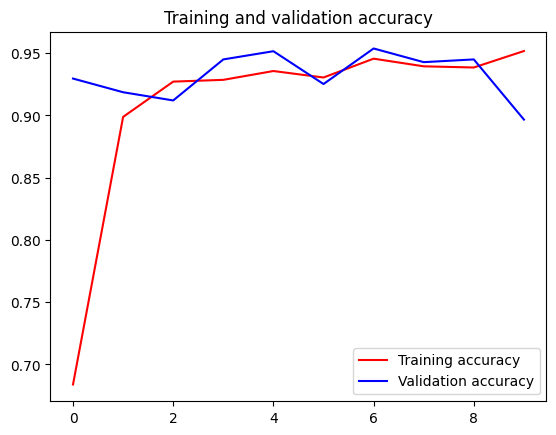

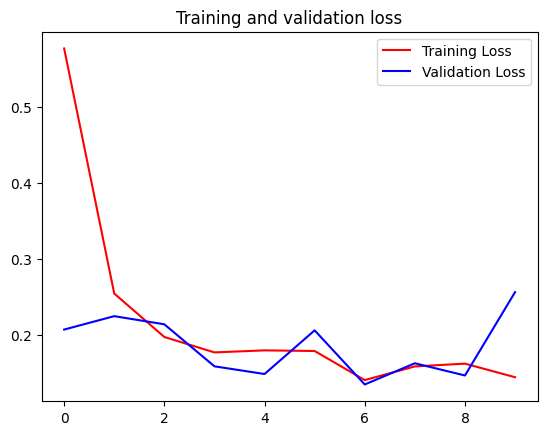

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [ ]:
!ls "/content/drive/My Drive/dataset2"


Plant_leave_diseases_dataset_with_augmentation	Plant_leave_diseases_dataset_without_augmentation
